# Exemplo - Multilayer Perceptron com TensorFlow

### Problema de Regressão: Qualidade de vinho tinto
<div>

<img src="https://images.unsplash.com/photo-1630369160812-26c7604cbd8c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=688&q=80" width="200" height="200" /> 
<img src="https://www.foodandwine.com/thmb/B6XvMMR6r9OcAETGgp2ypqK_-wI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red-wine-blends-FT-MAG1116-2000-4f3c3e91bcd646ea8a21f2152746ef53.jpg" width="200" height="200" />
 </div>

--- 

O modelo receberá como entrada as seguintes características de vinho tinto:

  - acidez fixa
  - acidez volátil
  - Ácido Cítrico
  - açúcar residual
  - cloretos
  - dióxido de enxofre livre
  - dióxido de enxofre total
  - densidade
  - pH
  - sulfatos
  - álcool

e irá prever a qualidade do vinho.

Portanto, o modelo será um modelo de regressão, que possui onze parâmetros e uma saída. A saída é contínua e pode assumir qualquer valor entre 0 e 10.

## 1. Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## 2. Carregando dataset

In [2]:
# Load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2.1. Dividindo o dataset em atributos e saída desejada

In [30]:
X = df.drop('quality', axis=1)
y =  df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Scale data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Criando o modelo

In [33]:
# Build model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1536      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


### 4.1. Compilando e treinando o modelo

In [34]:
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 14.4042 - val_loss: 3.7647
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 3.0497 - val_loss: 2.4012
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 2.1605 - val_loss: 2.0821
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.8638 - val_loss: 1.8192
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6438 - val_loss: 1.6253
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4489 - val_loss: 1.4522
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2788 - val_loss: 1.3216
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1772 - val_loss: 1.1715
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0410 - val_loss: 1.0834
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9326 - val_loss: 0.9743
Epoch 1

In [41]:
# Evaluate model

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


10/10 [==============================] - 0s 5ms/step
MSE:  0.42756434283216577
R2:  0.34573755277254936


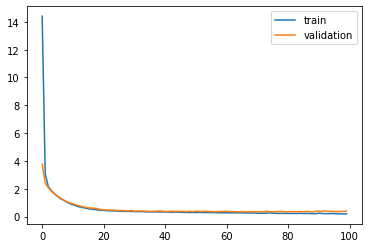

In [36]:
# Plot loss

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


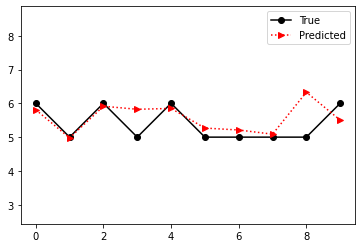

In [50]:
plt.plot(y_test[0:10], '-o', color='black')
plt.plot(y_pred[0:10], ':>', color='red')
plt.axis('equal')
plt.legend(['True', 'Predicted'])

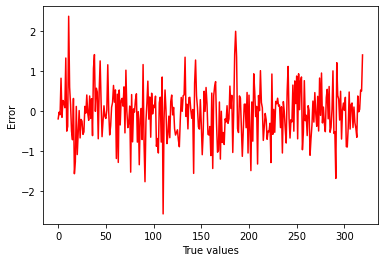

In [53]:
# Plot error distribution
error = y_pred - y_test
plt.plot(error, '-', color='red')
plt.xlabel('True values')
plt.ylabel('Error')
plt.show()
